<a href="https://colab.research.google.com/github/shashwatk77/jscourse/blob/master/Shash_Assignment_2_Question_1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloading data from yahoo
Using 'Close' and 'Adj Close' for the stock price

In [6]:
!pip install yfinance


Download the 13 week T-bill yield using yfinance

In [29]:
import yfinance as yf
import datetime

# time period
start_date = '2022-10-01'
end_date = '2022-12-31'

try:
    tbill_data = yf.download('^IRX', start=start_date, end=end_date)
    print(tbill_data.head())  # Prints the first few rows of the data
except Exception as e:
    print(f"Error downloading data: {e}")


[*********************100%%**********************]  1 of 1 completed

             Open   High    Low  Close  Adj Close  Volume
Date                                                     
2022-10-03  3.165  3.190  3.140  3.150      3.150       0
2022-10-04  3.305  3.320  3.260  3.315      3.315       0
2022-10-05  3.290  3.315  3.290  3.293      3.293       0
2022-10-06  3.285  3.298  3.263  3.288      3.288       0
2022-10-07  3.273  3.295  3.233  3.293      3.293       0


In [30]:
latest_yield = tbill_data['Adj Close'][-1]
print(f"Latest 13-week T-Bill yield: {latest_yield}%")

Latest 13-week T-Bill yield: 4.260000228881836%


Get the STOCKS  [Apple, Amazon, Google, Catpillar, MacDonald, Bank of America, Tesla, and Pfizer]

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as sco
import tensorflow as tf

In [32]:
np.random.seed(42)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#quandl.ApiConfig.api_key = 'PNzc8CxVBCyfmzjfFqaz'
stocks = ['AAPL','AMZN','GOOGL','BAC', 'MCD', 'CAT', 'TSLA','PFE']
#data = quandl.get_table('WIKI/PRICES', ticker = stocks,
#                        qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
#                        date = { 'gte': '2017-1-1', 'lte': '2022-12-31' }, paginate='false')
#data.head()
data = pd.DataFrame()
for stock in stocks:
    stock_history = yf.download(stock, start = "2017-01-01", end = "2022-12-31")
    stock_history["Ticker"] = stock
    data = pd.concat([data, stock_history[["Ticker","Adj Close"]]])
data = data.pivot(columns='Ticker')
data.columns = data.columns.droplevel(0)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [33]:
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1510 entries, 2017-01-03 to 2022-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1510 non-null   float64
 1   AMZN    1510 non-null   float64
 2   BAC     1510 non-null   float64
 3   CAT     1510 non-null   float64
 4   GOOGL   1510 non-null   float64
 5   MCD     1510 non-null   float64
 6   PFE     1510 non-null   float64
 7   TSLA    1510 non-null   float64
dtypes: float64(8)
memory usage: 106.2 KB


In [14]:
data.tail()

Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Date,,,,,,,,
2022-12-23,130.959961,85.250000,31.269262,233.973969,89.230003,260.166168,48.845371,123.150002
2022-12-27,129.142426,83.040001,31.327044,237.163589,87.389999,259.456329,48.185684,109.099998
2022-12-28,125.179680,81.820000,31.558168,233.496002,86.019997,257.774200,47.874680,112.709999
2022-12-29,128.725296,84.180000,31.914486,234.295868,88.449997,258.571533,48.374168,121.820000
2022-12-30,129.043121,84.000000,31.895220,233.671600,88.230003,256.237946,48.289352,123.180000


### Dataset we use

## Visualize the stock price

Text(0, 0.5, 'price in $')

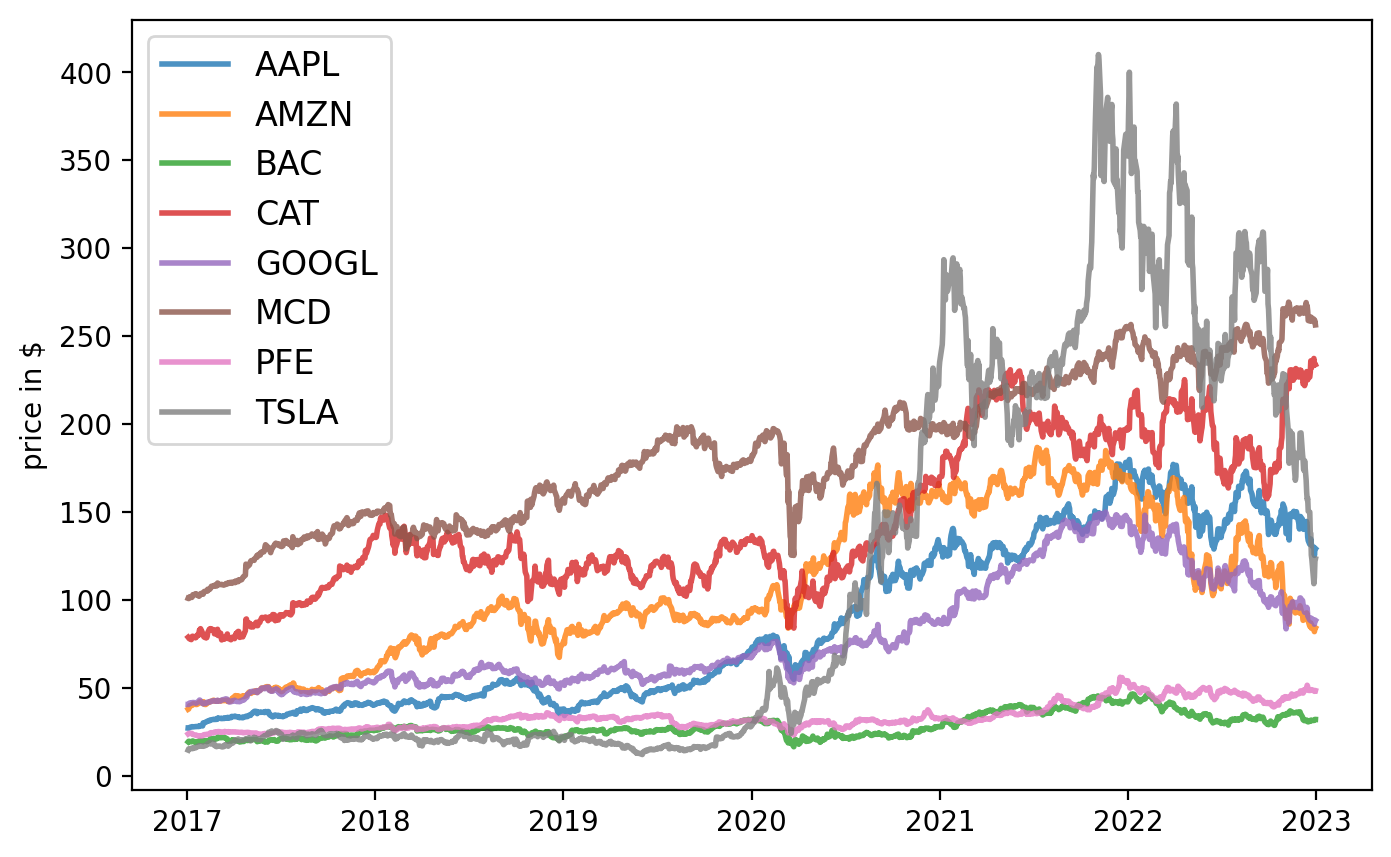

In [16]:
plt.figure(figsize=(8, 5))
for c in data.columns.values:
    plt.plot(data.index, data[c], lw=2, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

# Convert into weekly returns
### In this case, one always use simple returns
We Always  use returns for covariance analysis

In [17]:
stock_data = {}
weekly_returns = pd.DataFrame()
for stock in stocks:
    stock_data[stock] = yf.download(stock, start = "2017-01-01", end = "2022-12-31")
for stock in stocks:
    # Resample to weekly frequency, taking the last price of the week
    weekly_price = stock_data[stock]['Adj Close'].resample('W').last()

    # Calculate weekly returns from the weekly prices
    weekly_returns[stock] = weekly_price.pct_change()

# Drop the first row since it will be NaN due to the pct_change() calculation
weekly_returns = weekly_returns.dropna()
weekly_returns

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,AMZN,GOOGL,BAC,MCD,CAT,TSLA,PFE
Date,,,,,,,,
2017-01-15,0.009584,0.026571,0.006944,0.014550,0.006128,0.015477,0.038164,-0.028674
2017-01-22,0.008065,-0.010781,-0.003334,-0.016080,0.006255,0.009365,0.029358,-0.023063
2017-01-29,0.016250,0.033947,0.020358,0.031802,0.004908,0.046627,0.033588,-0.011017
2017-02-05,0.058466,-0.030595,-0.029466,-0.002997,0.011232,-0.057683,-0.006404,0.031729
2017-02-12,0.027989,0.021303,0.017948,-0.009017,0.012717,0.032483,0.071221,0.008102
...,...,...,...,...,...,...,...,...
2022-12-04,-0.002025,0.007708,0.030577,-0.037376,-0.000219,0.001824,0.065624,0.034546
2022-12-11,-0.038225,-0.053543,-0.075767,-0.102550,-0.004974,-0.037437,-0.081135,0.015910
2022-12-18,-0.053813,-0.013806,-0.027685,-0.021001,-0.021762,0.023890,-0.160961,-0.006187


Text(0, 0.5, 'weekly returns')

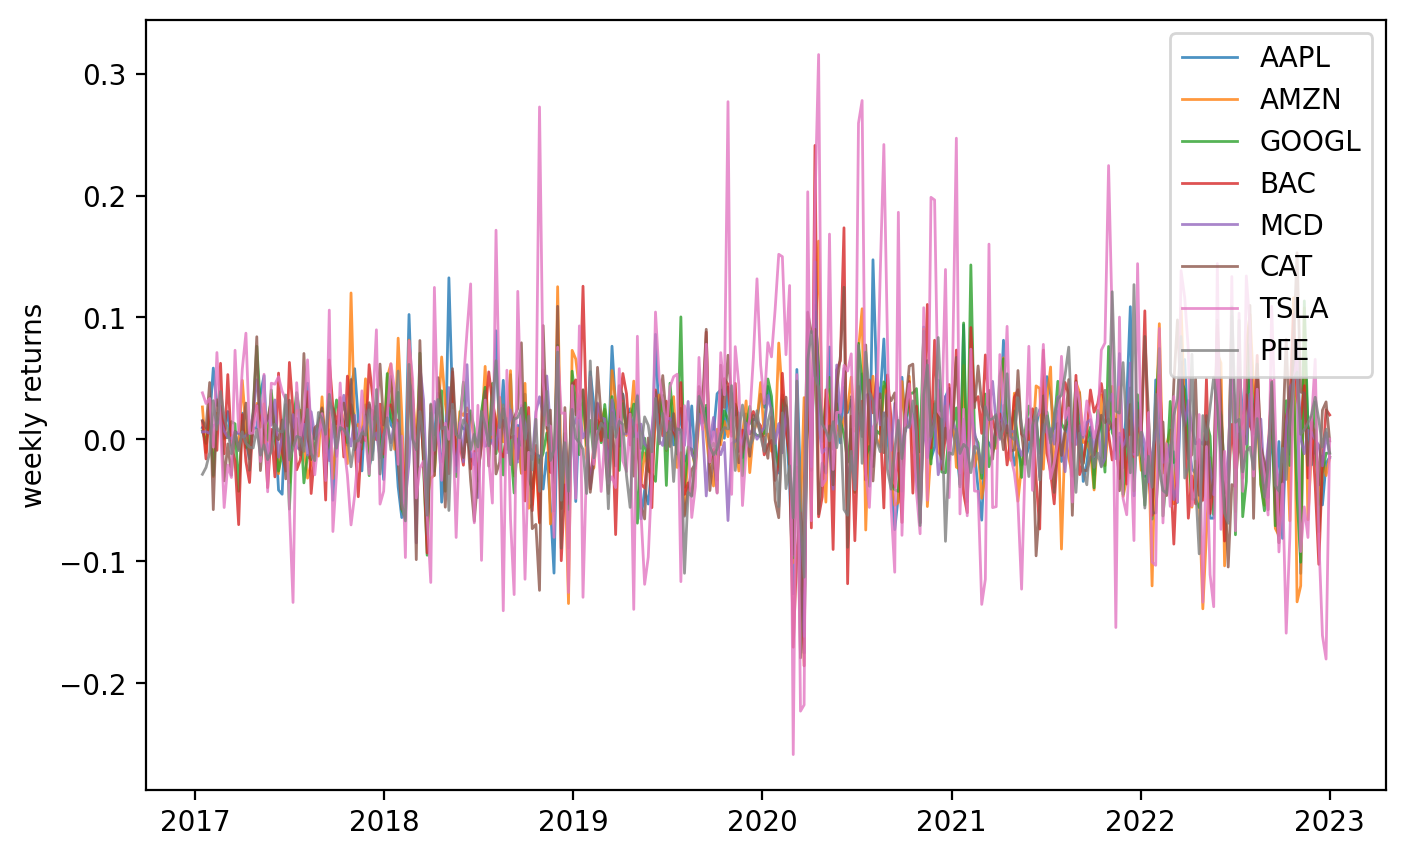

In [18]:
plt.figure(figsize=(8, 5))
for c in weekly_returns.columns.values:
    plt.plot(weekly_returns.index, weekly_returns[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('weekly returns')

***Question 1a.	On the first business day of January, 2023, use weekly data (before that day) to estimate the covariance matrix for weekly returns***

In [19]:
## rounded to 5 digit
cov_matrix = weekly_returns.cov().round(5)
cov_matrix


,AAPL,AMZN,GOOGL,BAC,MCD,CAT,TSLA,PFE
AAPL,0.00160,0.00092,0.00088,0.00069,0.00054,0.00048,0.00156,0.00042
AMZN,0.00092,0.00189,0.00103,0.00058,0.00035,0.00049,0.00150,0.00030
GOOGL,0.00088,0.00103,0.00138,0.00078,0.00047,0.00060,0.00123,0.00040
BAC,0.00069,0.00058,0.00078,0.00209,0.00063,0.00121,0.00109,0.00043
MCD,0.00054,0.00035,0.00047,0.00063,0.00081,0.00052,0.00088,0.00031
CAT,0.00048,0.00049,0.00060,0.00121,0.00052,0.00188,0.00090,0.00048
TSLA,0.00156,0.00150,0.00123,0.00109,0.00088,0.00090,0.00743,0.00054
PFE,0.00042,0.00030,0.00040,0.00043,0.00031,0.00048,0.00054,0.00113


***Question 1b. Use any ML tools to forecast the returns for each stocks for the first week of January of 2023. You can use any ML models for the forecast***

In [26]:
import math

import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM,Dropout, Masking, Input
from sklearn.model_selection import train_test_split


In [21]:
train_pct=0.8
scaler = MinMaxScaler(feature_range=(0,1))
dataset = data.values
train_data_len=math.ceil(len(dataset)*train_pct)
scaled_data = scaler.fit_transform(dataset)

In [22]:
n_period= 100
# Training dataset
train_data=scaled_data[0:train_data_len]
x_train=[]
y_train=[]

for i in range(n_period, len(train_data)-4):
    x_train.append(train_data[i-n_period:i])
    y_train.append(train_data[i:i+4,:])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train=np.reshape(x_train, (x_train.shape[0], x_train.shape[1],8))
y_train = np.reshape(y_train, (y_train.shape[0],4,8))
x_train.shape

(1104, 100, 8)

In [23]:
test_data = scaled_data[train_data_len + n_period:]
# Testing Dataset
x_test = []
y_test = []

for i in range(n_period , len(test_data)-4):
    x_test.append(test_data[i-n_period:i])
    y_test.append(test_data[i:i+4,:])
x_test, y_test=np.array(x_test), np.array(y_test)
x_test=np.reshape(x_test, (x_test.shape[0], x_test.shape[1],8))
y_test = np.reshape(y_test, (y_test.shape[0], 4,8))
y_test.shape

(98, 4, 8)

In [24]:
# Padding Testing set to have some zero sequences so input for fit and validation are the same in dimensionality
train_test_diff = x_train[:,:,0].shape[0] - x_test[:,:,0].shape[0]

# x_test = np.pad(x_test, ((0,train_test_diff),(0,0),(0,0)), mode = "constant", constant_values=2)
# y_test = np.pad(y_test, ((0,train_test_diff),(0,0)), mode = "constant", constant_values=2)
y_test.shape

(98, 4, 8)

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker AAPL
Epoch 1/100
138/138 [==============================] - 27s 139ms/step - loss: 0.1467 - val_loss: 0.5788
Epoch 2/100
138/138 [==============================] - 19s 136ms/step - loss: 0.1101 - val_loss: 0.3974
Epoch 3/100
138/138 [==============================] - 17s 123ms/step - loss: 0.0585 - val_loss: 0.1291
Epoch 4/100
138/138 [==============================] - 17s 123ms/step - loss: 0.0129 - val_loss: 0.0108
Epoch 5/100
138/138 [==============================] - 18s 129ms/step - loss: 0.0041 - val_loss: 0.0047
Epoch 6/100
138/138 [==============================] - 18s 132ms/step - loss: 0.0031 - val_loss: 0.0049
Epoch 7/100
138/138 [==============================] - 18s 128ms/step - loss: 0.0027 - val_loss: 0.0055
Epoch 8/100
138/138 [==============================] - 17s 124ms/step - loss: 0.0023 - val_loss: 0.0057
Epoch 9/100
138/138 [==============================] - 17s 123ms/step - loss: 0.0022 - val_l

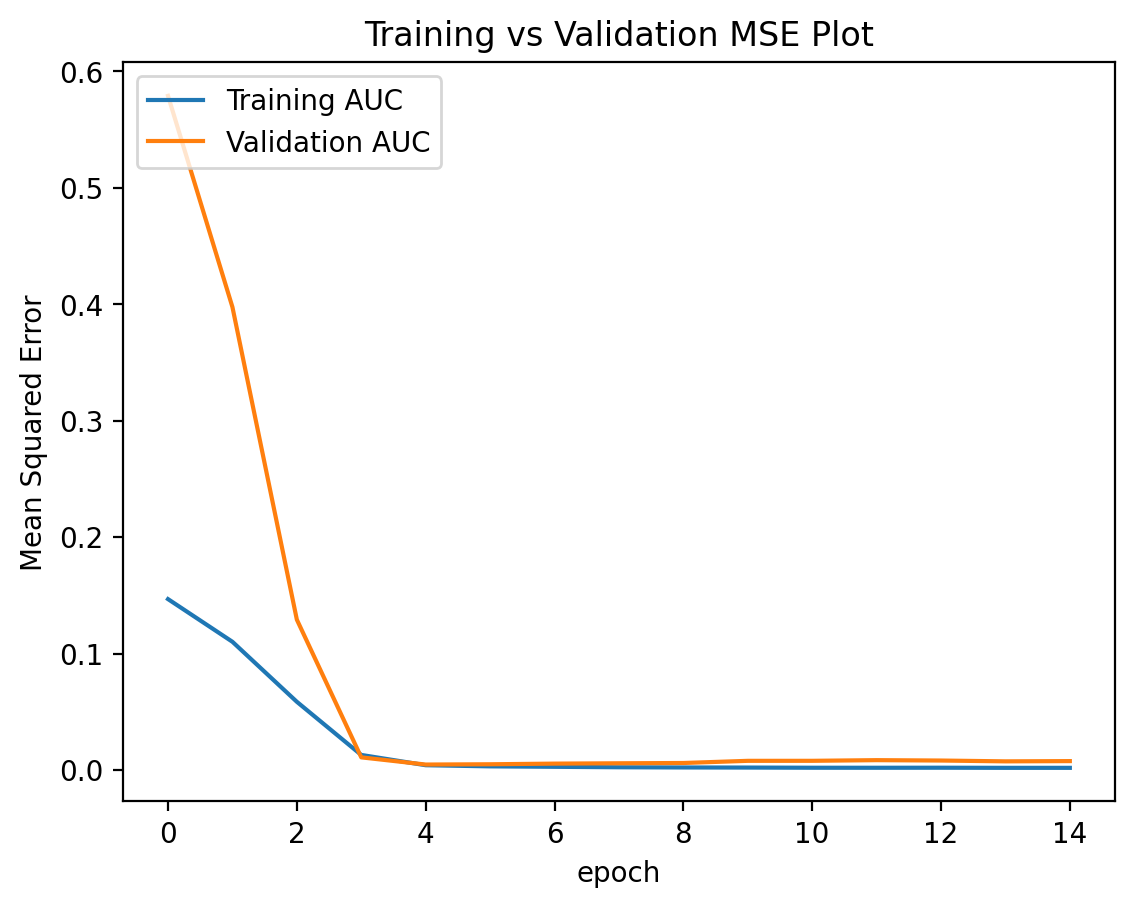

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker AMZN
Epoch 1/100
138/138 [==============================] - 27s 152ms/step - loss: 0.2462 - val_loss: 0.1779
Epoch 2/100
138/138 [==============================] - 17s 125ms/step - loss: 0.1590 - val_loss: 0.0781
Epoch 3/100
138/138 [==============================] - 18s 130ms/step - loss: 0.0460 - val_loss: 0.0087
Epoch 4/100
138/138 [==============================] - 17s 124ms/step - loss: 0.0041 - val_loss: 0.0110
Epoch 5/100
138/138 [==============================] - 17s 124ms/step - loss: 0.0031 - val_loss: 0.0104
Epoch 6/100
138/138 [==============================] - 18s 130ms/step - loss: 0.0029 - val_loss: 0.0098
Epoch 7/100
138/138 [==============================] - 17s 124ms/step - loss: 0.0029 - val_loss: 0.0099
Epoch 8/100
138/138 [==============================] - 17s 125ms/step - loss: 0.0028 - val_loss: 0.0108
Epoch 9/100
138/138 [==============================] - 18s 128ms/step - loss: 0.0028 - val_l

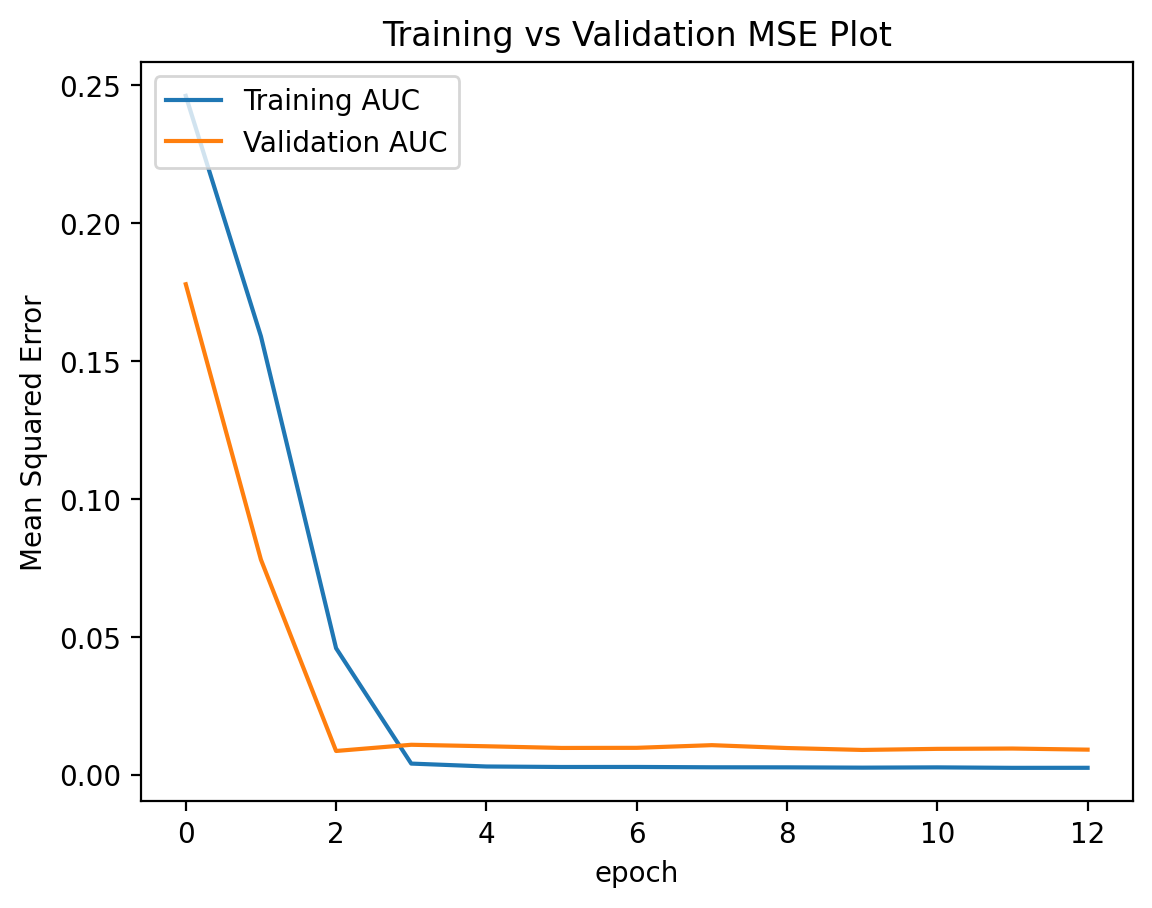

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker GOOGL
Epoch 1/100
138/138 [==============================] - 27s 147ms/step - loss: 0.1319 - val_loss: 0.2274
Epoch 2/100
138/138 [==============================] - 19s 135ms/step - loss: 0.0857 - val_loss: 0.1133
Epoch 3/100
138/138 [==============================] - 19s 141ms/step - loss: 0.0256 - val_loss: 0.0122
Epoch 4/100
138/138 [==============================] - 21s 152ms/step - loss: 0.0059 - val_loss: 0.0076
Epoch 5/100
138/138 [==============================] - 18s 127ms/step - loss: 0.0054 - val_loss: 0.0074
Epoch 6/100
138/138 [==============================] - 17s 126ms/step - loss: 0.0051 - val_loss: 0.0074
Epoch 7/100
138/138 [==============================] - 18s 132ms/step - loss: 0.0051 - val_loss: 0.0075
Epoch 8/100
138/138 [==============================] - 17s 126ms/step - loss: 0.0049 - val_loss: 0.0076
Epoch 9/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0049 - val_

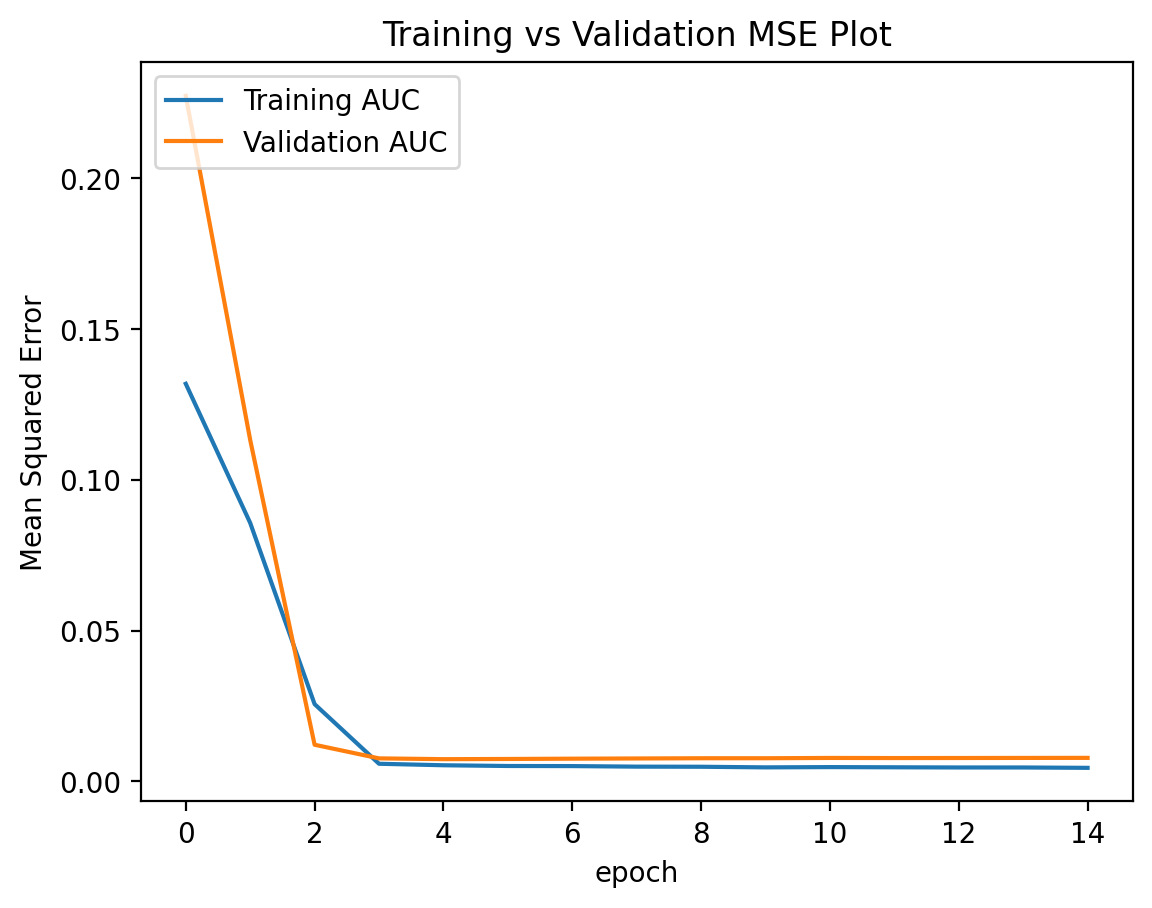

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker BAC
Epoch 1/100
138/138 [==============================] - 26s 140ms/step - loss: 0.1542 - val_loss: 0.4570
Epoch 2/100
138/138 [==============================] - 18s 133ms/step - loss: 0.1072 - val_loss: 0.2837
Epoch 3/100
138/138 [==============================] - 17s 126ms/step - loss: 0.0416 - val_loss: 0.0641
Epoch 4/100
138/138 [==============================] - 18s 132ms/step - loss: 0.0060 - val_loss: 0.0199
Epoch 5/100
138/138 [==============================] - 18s 128ms/step - loss: 0.0042 - val_loss: 0.0184
Epoch 6/100
138/138 [==============================] - 18s 127ms/step - loss: 0.0040 - val_loss: 0.0188
Epoch 7/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0039 - val_loss: 0.0190
Epoch 8/100
138/138 [==============================] - 18s 127ms/step - loss: 0.0037 - val_loss: 0.0165
Epoch 9/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0038 - val_lo

1/1 [==============================] - 1s 1s/step


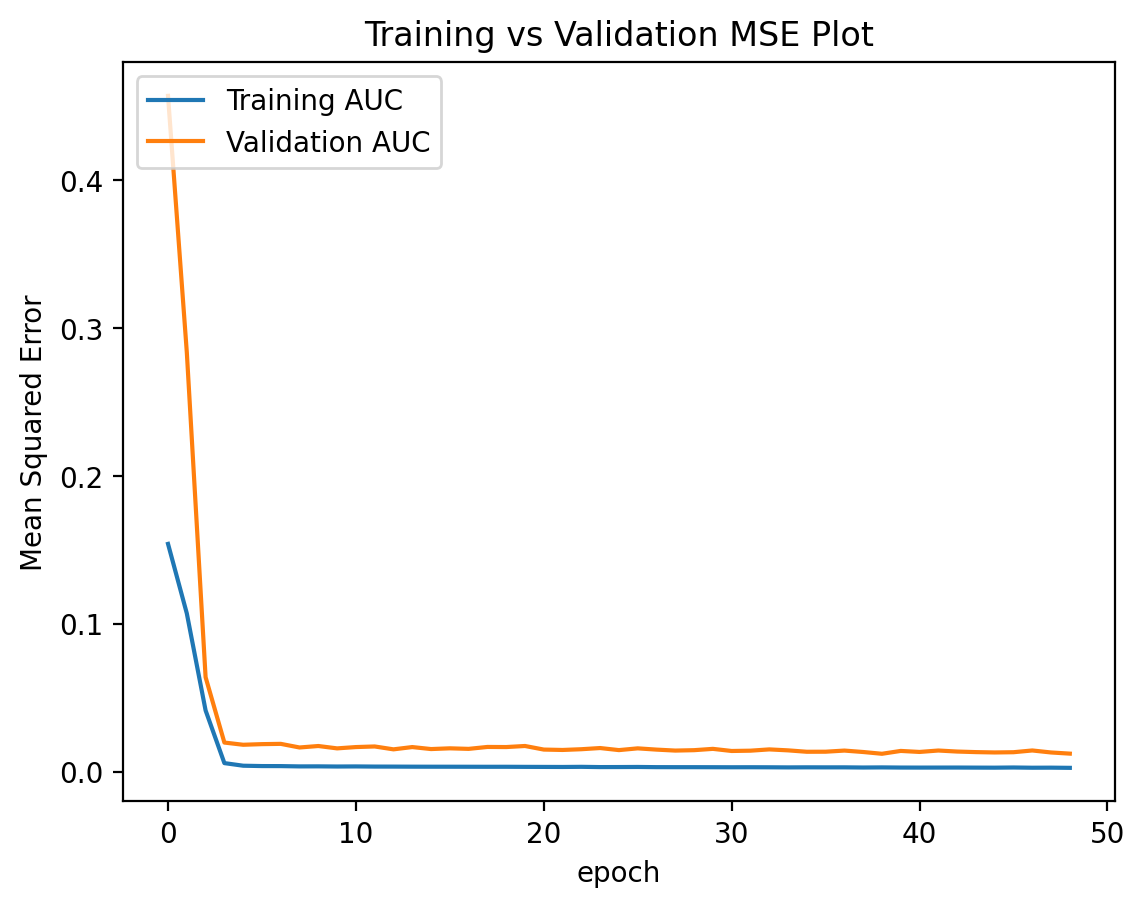

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker MCD
Epoch 1/100
138/138 [==============================] - 27s 151ms/step - loss: 0.1225 - val_loss: 0.2464
Epoch 2/100
138/138 [==============================] - 19s 138ms/step - loss: 0.0858 - val_loss: 0.1448
Epoch 3/100
138/138 [==============================] - 18s 132ms/step - loss: 0.0397 - val_loss: 0.0270
Epoch 4/100
138/138 [==============================] - 20s 144ms/step - loss: 0.0087 - val_loss: 0.0041
Epoch 5/100
138/138 [==============================] - 19s 134ms/step - loss: 0.0044 - val_loss: 0.0053
Epoch 6/100
138/138 [==============================] - 19s 135ms/step - loss: 0.0032 - val_loss: 0.0056
Epoch 7/100
138/138 [==============================] - 19s 135ms/step - loss: 0.0025 - val_loss: 0.0063
Epoch 8/100
138/138 [==============================] - 19s 134ms/step - loss: 0.0021 - val_loss: 0.0076
Epoch 9/100
138/138 [==============================] - 19s 137ms/step - loss: 0.0018 - val_lo

1/1 [==============================] - 1s 1s/step


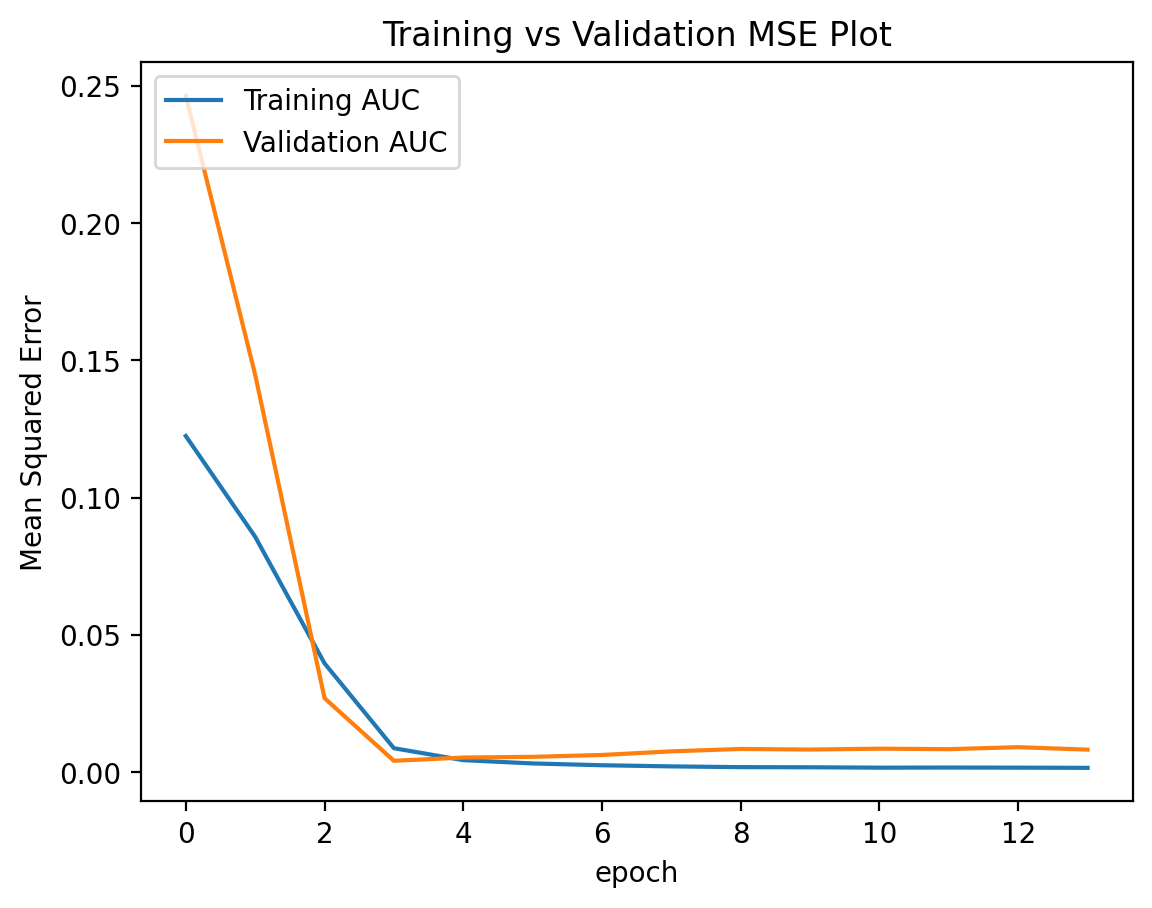

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker CAT
Epoch 1/100
138/138 [==============================] - 28s 148ms/step - loss: 0.2091 - val_loss: 0.7154
Epoch 2/100
138/138 [==============================] - 17s 127ms/step - loss: 0.1551 - val_loss: 0.4970
Epoch 3/100
138/138 [==============================] - 18s 129ms/step - loss: 0.0795 - val_loss: 0.1660
Epoch 4/100
138/138 [==============================] - 18s 132ms/step - loss: 0.0141 - val_loss: 0.0172
Epoch 5/100
138/138 [==============================] - 18s 127ms/step - loss: 0.0035 - val_loss: 0.0114
Epoch 6/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0032 - val_loss: 0.0102
Epoch 7/100
138/138 [==============================] - 18s 128ms/step - loss: 0.0032 - val_loss: 0.0091
Epoch 8/100
138/138 [==============================] - 18s 131ms/step - loss: 0.0031 - val_loss: 0.0081
Epoch 9/100
138/138 [==============================] - 18s 129ms/step - loss: 0.0029 - val_lo

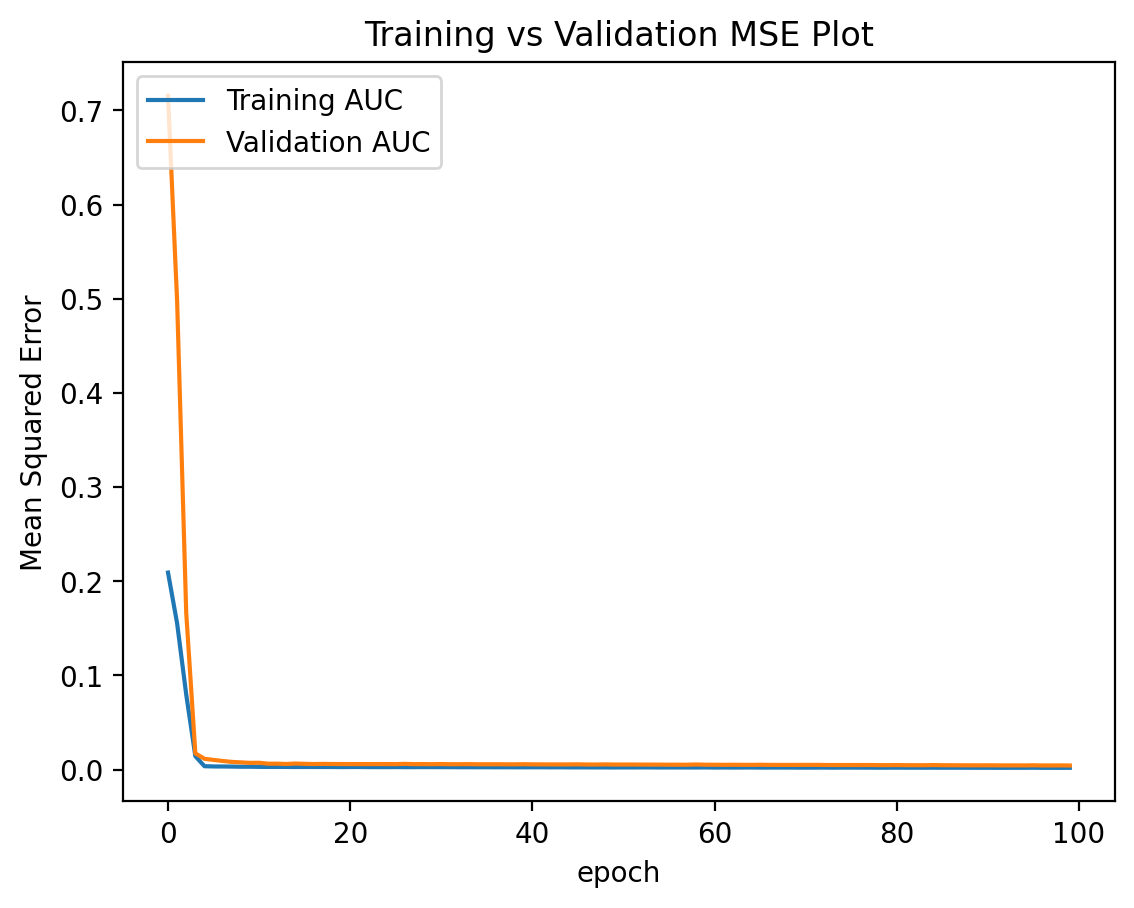

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker TSLA
Epoch 1/100
138/138 [==============================] - 26s 140ms/step - loss: 0.0739 - val_loss: 0.4037
Epoch 2/100
138/138 [==============================] - 19s 134ms/step - loss: 0.0564 - val_loss: 0.2932
Epoch 3/100
138/138 [==============================] - 17s 127ms/step - loss: 0.0279 - val_loss: 0.0951
Epoch 4/100
138/138 [==============================] - 17s 126ms/step - loss: 0.0056 - val_loss: 0.0208
Epoch 5/100
138/138 [==============================] - 19s 135ms/step - loss: 0.0040 - val_loss: 0.0185
Epoch 6/100
138/138 [==============================] - 17s 126ms/step - loss: 0.0039 - val_loss: 0.0173
Epoch 7/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0037 - val_loss: 0.0139
Epoch 8/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0036 - val_loss: 0.0123
Epoch 9/100
138/138 [==============================] - 18s 128ms/step - loss: 0.0035 - val_l

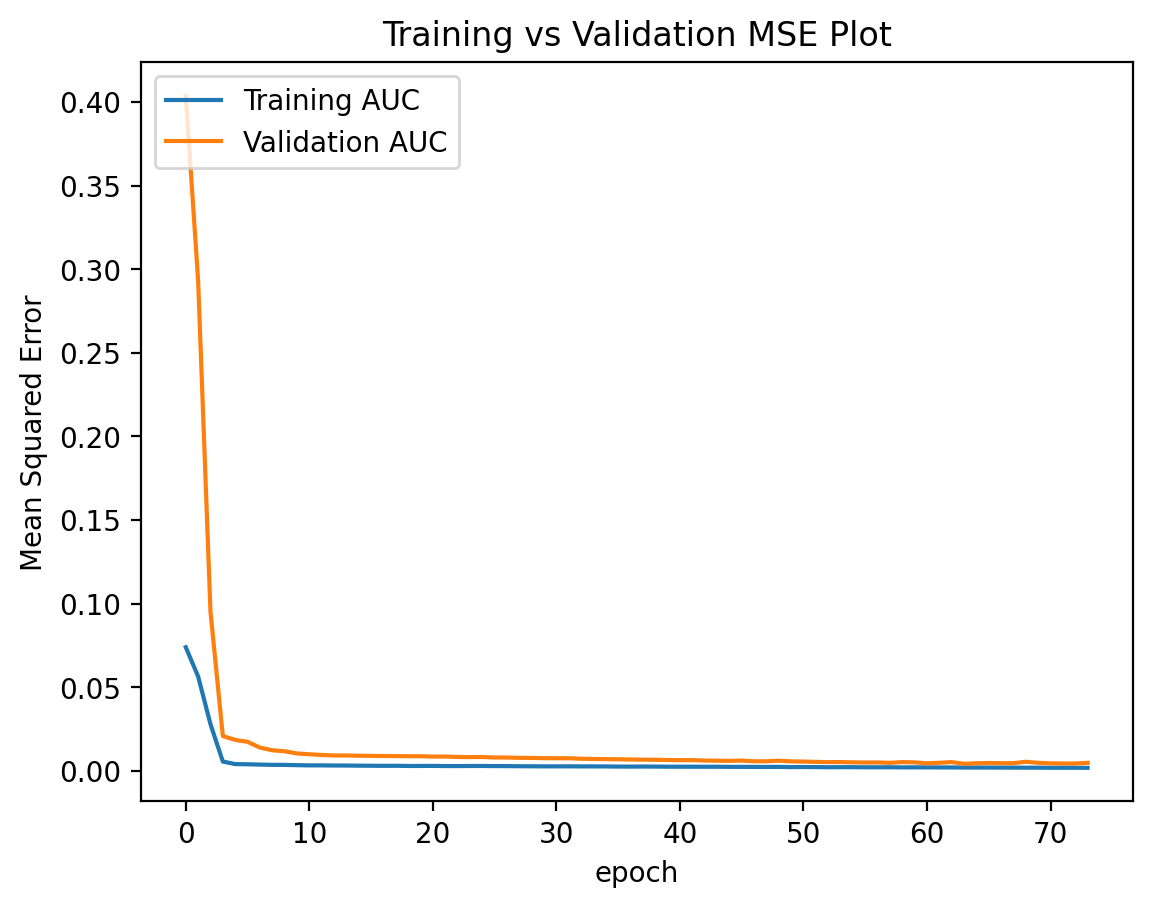

''''''''''''''''''''''''''''''''''''''''''''''''''
Training for ticker PFE
Epoch 1/100
138/138 [==============================] - 27s 151ms/step - loss: 0.0687 - val_loss: 0.2680
Epoch 2/100
138/138 [==============================] - 19s 134ms/step - loss: 0.0527 - val_loss: 0.1857
Epoch 3/100
138/138 [==============================] - 18s 133ms/step - loss: 0.0321 - val_loss: 0.0727
Epoch 4/100
138/138 [==============================] - 18s 130ms/step - loss: 0.0117 - val_loss: 0.0091
Epoch 5/100
138/138 [==============================] - 19s 138ms/step - loss: 0.0047 - val_loss: 0.0084
Epoch 6/100
138/138 [==============================] - 18s 131ms/step - loss: 0.0032 - val_loss: 0.0119
Epoch 7/100
138/138 [==============================] - 21s 155ms/step - loss: 0.0025 - val_loss: 0.0109
Epoch 8/100
138/138 [==============================] - 19s 141ms/step - loss: 0.0022 - val_loss: 0.0111
Epoch 9/100
138/138 [==============================] - 21s 151ms/step - loss: 0.0019 - val_lo

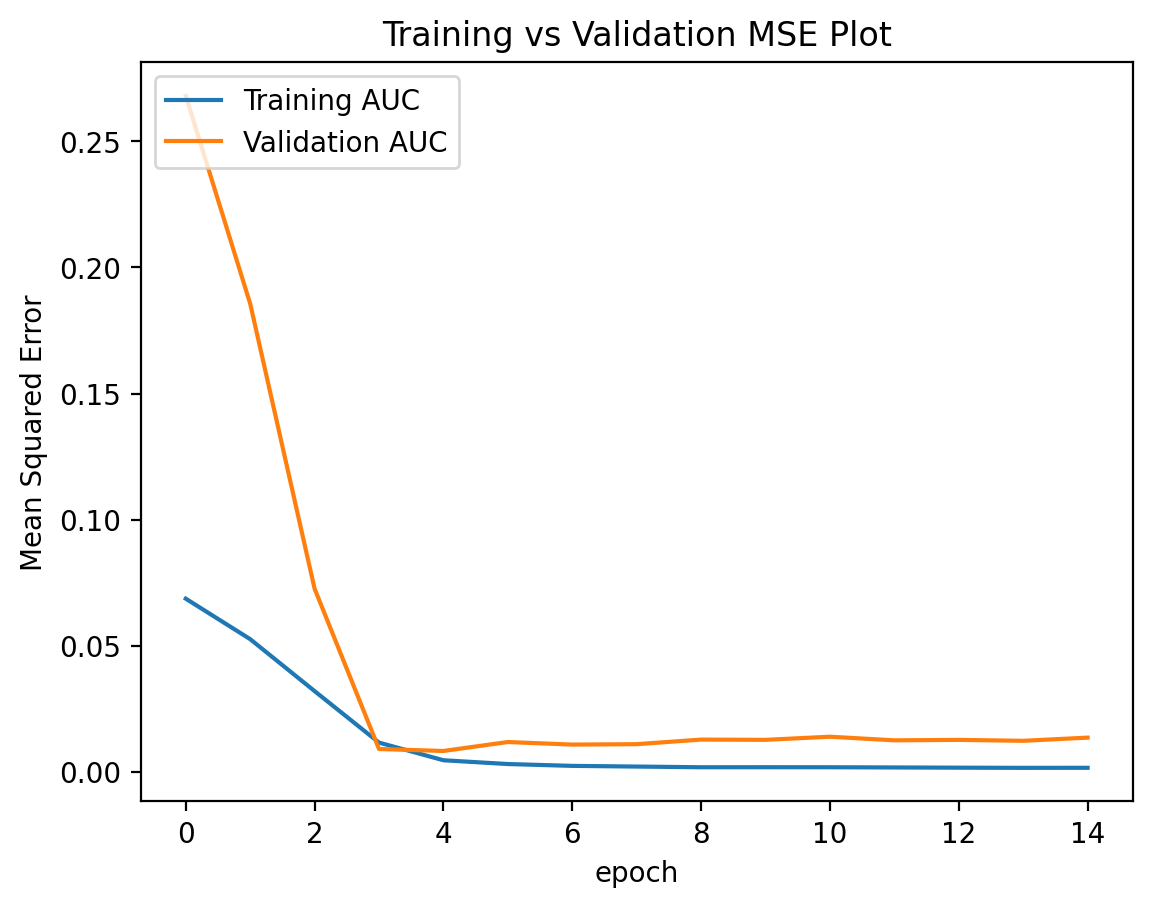

In [28]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
predictions = []
x_predict = test_data[-n_period:].reshape([1,n_period,8])
# predictions = []
# mses = []
for i, stock in enumerate(stocks):
    print("''''''''''''''''''''''''''''''''''''''''''''''''''")
    print("Training for ticker " + stock)
    model=Sequential()
    model.add(LSTM(n_period,return_sequences=True ))
    model.add(Dropout(.2))
    model.add(LSTM(n_period, return_sequences=True))
    model.add(Dropout(.2))
    model.add(LSTM(n_period))
    model.add(Dense(100))
    model.add(Dense(25))
    model.add(Dense(4))
    model.compile(optimizer=tf.keras.optimizers.Adam(5e-6), loss='mean_squared_error')
    ticker_model = model.fit(x_train[:,:,i].reshape(x_train.shape[0], x_train.shape[1],1),y_train[:,:,i].reshape(y_train.shape[0],4,1),
                             batch_size = 8, epochs = 10, validation_data = (x_test[:,:,i].reshape(x_test.shape[0], x_test.shape[1],1),y_test[:,:,i].reshape(y_test.shape[0],4,1)),
                             callbacks = [callback])
    ticker_prediction = model.predict(x_predict[:,:,i].reshape(x_predict.shape[0], x_predict.shape[1],1))[0][:]
    predictions.append(ticker_prediction)
    #model_save_name = F"ticker {stock} model.keras"
    #path = F"/content/gdrive/My Drive/Colab Models/{model_save_name}"
    #model.save(path)
    plt.plot(ticker_model.history['loss'])
    plt.plot(ticker_model.history['val_loss'])
    plt.title('Training vs Validation MSE Plot')
    plt.ylabel('Mean Squared Error')
    plt.xlabel('epoch')
    plt.legend(['Training AUC', 'Validation AUC'], loc='upper left')
    plt.show()

In [34]:
predictions


[array([0.7469773 , 0.74405503, 0.7311527 , 0.71384704], dtype=float32),
 array([0.3366065 , 0.32507277, 0.33374092, 0.41016677], dtype=float32),
 array([0.55835235, 0.5636593 , 0.5530294 , 0.5557766 ], dtype=float32),
 array([0.9702154, 0.9647795, 0.9644827, 0.9706677], dtype=float32),
 array([0.49623275, 0.50513226, 0.49495322, 0.44229177], dtype=float32),
 array([0.9617611, 0.9729059, 0.9674407, 0.9727786], dtype=float32),
 array([0.7782948 , 0.77061343, 0.77054167, 0.7620905 ], dtype=float32),
 array([0.38303885, 0.40483922, 0.39716706, 0.39763954], dtype=float32)]

In [41]:
stock_prediction = scaler.inverse_transform(np.transpose(predictions))
stock_prediction

array([[141.07141 ,  87.79983 ,  33.173725, 232.39633 ,  94.70117 ,
        262.73492 ,  48.465282, 164.39561 ],
       [140.62498 ,  86.08261 ,  33.33352 , 231.52628 ,  95.675224,
        264.61346 ,  48.20744 , 173.073   ],
       [138.65396 ,  87.37318 ,  33.01345 , 231.47878 ,  94.56113 ,
        263.69226 ,  48.205032, 170.01918 ],
       [136.01025 ,  98.75199 ,  33.09617 , 232.46872 ,  88.79733 ,
        264.59204 ,  47.92135 , 170.20726 ]], dtype=float32)

Actual for all these stock in 1st week of January 2023

In [37]:
actuals = pd.DataFrame()
for stock in stocks:
    stock_history = yf.download(stock, start = "2023-01-01", end = "2023-01-07")
    stock_history["Ticker"] = stock
    actuals = pd.concat([actuals, stock_history[["Ticker","Adj Close"]]])
actuals = actuals[["Ticker","Adj Close"]]
actuals = actuals.pivot(columns='Ticker')
actuals.columns = actuals.columns.droplevel(0)
actuals

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Date,,,,,,,,
2023-01-03,124.216293,85.820000,32.270802,233.008301,89.120003,257.015778,48.308193,108.099998
2023-01-04,125.497498,85.139999,32.877502,235.427338,88.080002,257.074158,47.243263,113.639999
2023-01-05,124.166641,83.120003,32.810093,234.373886,86.199997,254.905869,46.800327,110.339996
2023-01-06,128.735229,86.080002,33.137524,242.742996,87.339996,262.013580,47.987766,113.059998


In [51]:
# Create new dataframe by referencing the actual and replace the value with predicted stock values
pred = actuals
for i in range(len(stock_prediction)):
  for j in range(len(stocks)):
    pred.iloc [i,j] = stock_prediction [i][j]
pred


Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Date,,,,,,,,
2023-01-03,141.071411,87.799828,33.173725,232.396332,94.701172,262.734924,48.465282,164.395615
2023-01-04,140.624985,86.082611,33.333519,231.526276,95.675224,264.613464,48.207439,173.072998
2023-01-05,138.653961,87.373177,33.013451,231.478775,94.561127,263.692261,48.205032,170.019180
2023-01-06,136.010254,98.751991,33.096169,232.468719,88.797333,264.592041,47.921349,170.207260


In [53]:
predicted_returns = pred.pct_change()
predicted_returns

Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Date,,,,,,,,
2023-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-01-04,-0.003165,-0.019558,0.004817,-0.003744,0.010286,0.007150,-0.005320,0.052784
2023-01-05,-0.014016,0.014992,-0.009602,-0.000205,-0.011645,-0.003481,-0.000050,-0.017645
2023-01-06,-0.019067,0.130232,0.002506,0.004277,-0.060953,0.003412,-0.005885,0.001106


Text(0, 0.5, 'daily returns')

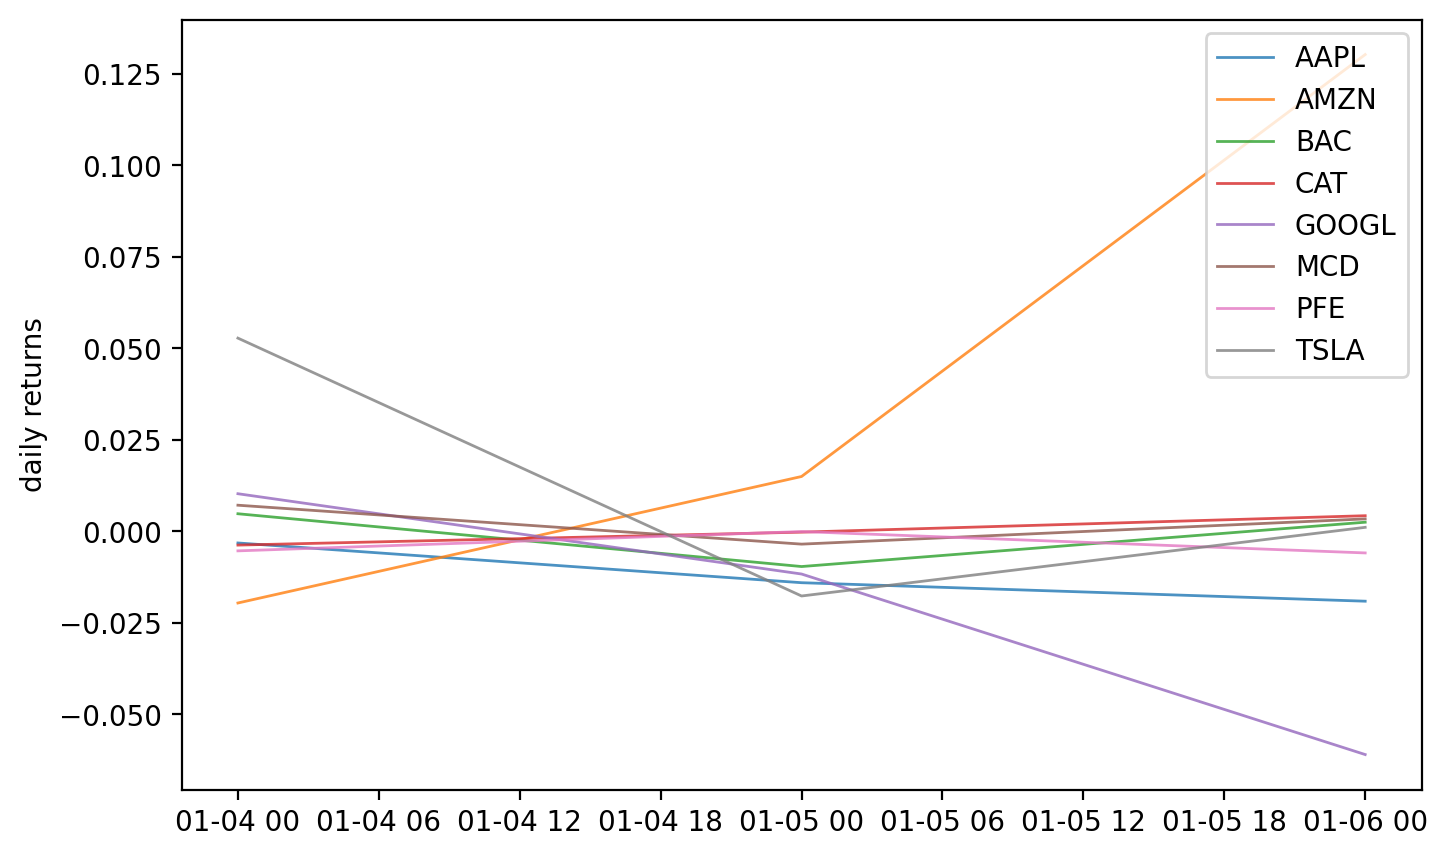

In [55]:
plt.figure(figsize=(8, 5))
for c in predicted_returns.columns.values:
    plt.plot(predicted_returns.index, predicted_returns[c], lw=1, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=10)
plt.ylabel('daily returns')

***Question 1c. your estimations from a) and b) to find the portfolio with the highest Sharpe ratio, i.e, the efficient frontier portfolio. You might assume that there is no short sale (portfolio coefficients are nonnegative).***
## Random Portfolios Generation
Calculate the returns and std, and to make it as an week calculation we take into account 4 business days in January 1st week 2023

The convention for converting 1 day variance $\sigma^2_{day}$  to 1 year variance $\sigma^2_{year}$ is $$\sigma^2_{year}=\sigma^2_{day}\times 4$$
Equivalently,
$$\sigma_{year}=\sigma_{day}\times \sqrt{4}$$
Here
$$\sigma^2_P=\alpha^\top \times \Sigma\times\alpha $$
$$\sigma_P=\sqrt{\sigma^2_P}$$
$$r_P=\alpha^\top\times {\bf r}$$
$$SR_P=\frac{r_P-r_f}{\sigma_P}$$

In [64]:
# number of business days in 1st week of Jan 2023 is 4
def portfolio_week2023Jan_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights )*4
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))*np.sqrt(252)
    return std, returns

def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(len(stocks))
        weights /= np.sum(weights)  #make sure the sum is 1
        weights_record.append(weights)
        portfolio_std, portfolio_return = portfolio_week2023Jan_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std
    return results, weights_record

## From the predicted stock prices data, we can estimate the inputs needed for the MV Analysis:
1. expected returns ${\bf r}$
2. variance-covariance matrix $\Sigma$
3. we also need risk free interest rate $r_f$

We are generating num_portfolios random portfolios


In [71]:
mean_returns = predicted_returns.mean()
cov_matrix = predicted_returns.cov()
num_portfolios = 25000
risk_free_rate = (latest_yield/100).round(4)



In [72]:
mean_returns.round(4)

Ticker
AAPL    -0.0121
AMZN     0.0419
BAC     -0.0008
CAT      0.0001
GOOGL   -0.0208
MCD      0.0024
PFE     -0.0038
TSLA     0.0121
dtype: float64

In [73]:
cov_matrix.round(4)

Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Ticker,,,,,,,,
AAPL,0.0001,-0.0006,0.0000,-0.0000,0.0003,0.0000,-0.0000,0.0002
AMZN,-0.0006,0.0062,0.0001,0.0003,-0.0029,-0.0000,-0.0001,-0.0013
BAC,0.0000,0.0001,0.0001,-0.0000,-0.0000,0.0000,-0.0000,0.0002
CAT,-0.0000,0.0003,-0.0000,0.0000,-0.0001,-0.0000,-0.0000,-0.0001
GOOGL,0.0003,-0.0029,-0.0000,-0.0001,0.0013,0.0000,0.0000,0.0007
MCD,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,-0.0000,0.0002
PFE,-0.0000,-0.0001,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0001
TSLA,0.0002,-0.0013,0.0002,-0.0001,0.0007,0.0002,-0.0001,0.0013


In [59]:
predicted_returns.corr().round(4)

Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Ticker,,,,,,,,
AAPL,1.0000,-0.8732,0.3498,-0.9623,0.9107,0.5324,-0.1194,0.8387
AMZN,-0.8732,1.0000,0.1512,0.9728,-0.9965,-0.0523,-0.3796,-0.4668
BAC,0.3498,0.1512,1.0000,-0.0819,-0.0685,0.9792,-0.9719,0.8036
CAT,-0.9623,0.9728,-0.0819,1.0000,-0.9887,-0.2822,-0.1550,-0.6590
GOOGL,0.9107,-0.9965,-0.0685,-0.9887,1.0000,0.1351,0.3014,0.5387
MCD,0.5324,-0.0523,0.9792,-0.2822,0.1351,1.0000,-0.9040,0.9076
PFE,-0.1194,-0.3796,-0.9719,-0.1550,0.3014,-0.9040,1.0000,-0.6409
TSLA,0.8387,-0.4668,0.8036,-0.6590,0.5387,0.9076,-0.6409,1.0000


<Axes: title={'center': 'Correlation Matrix'}, xlabel='Ticker', ylabel='Ticker'>

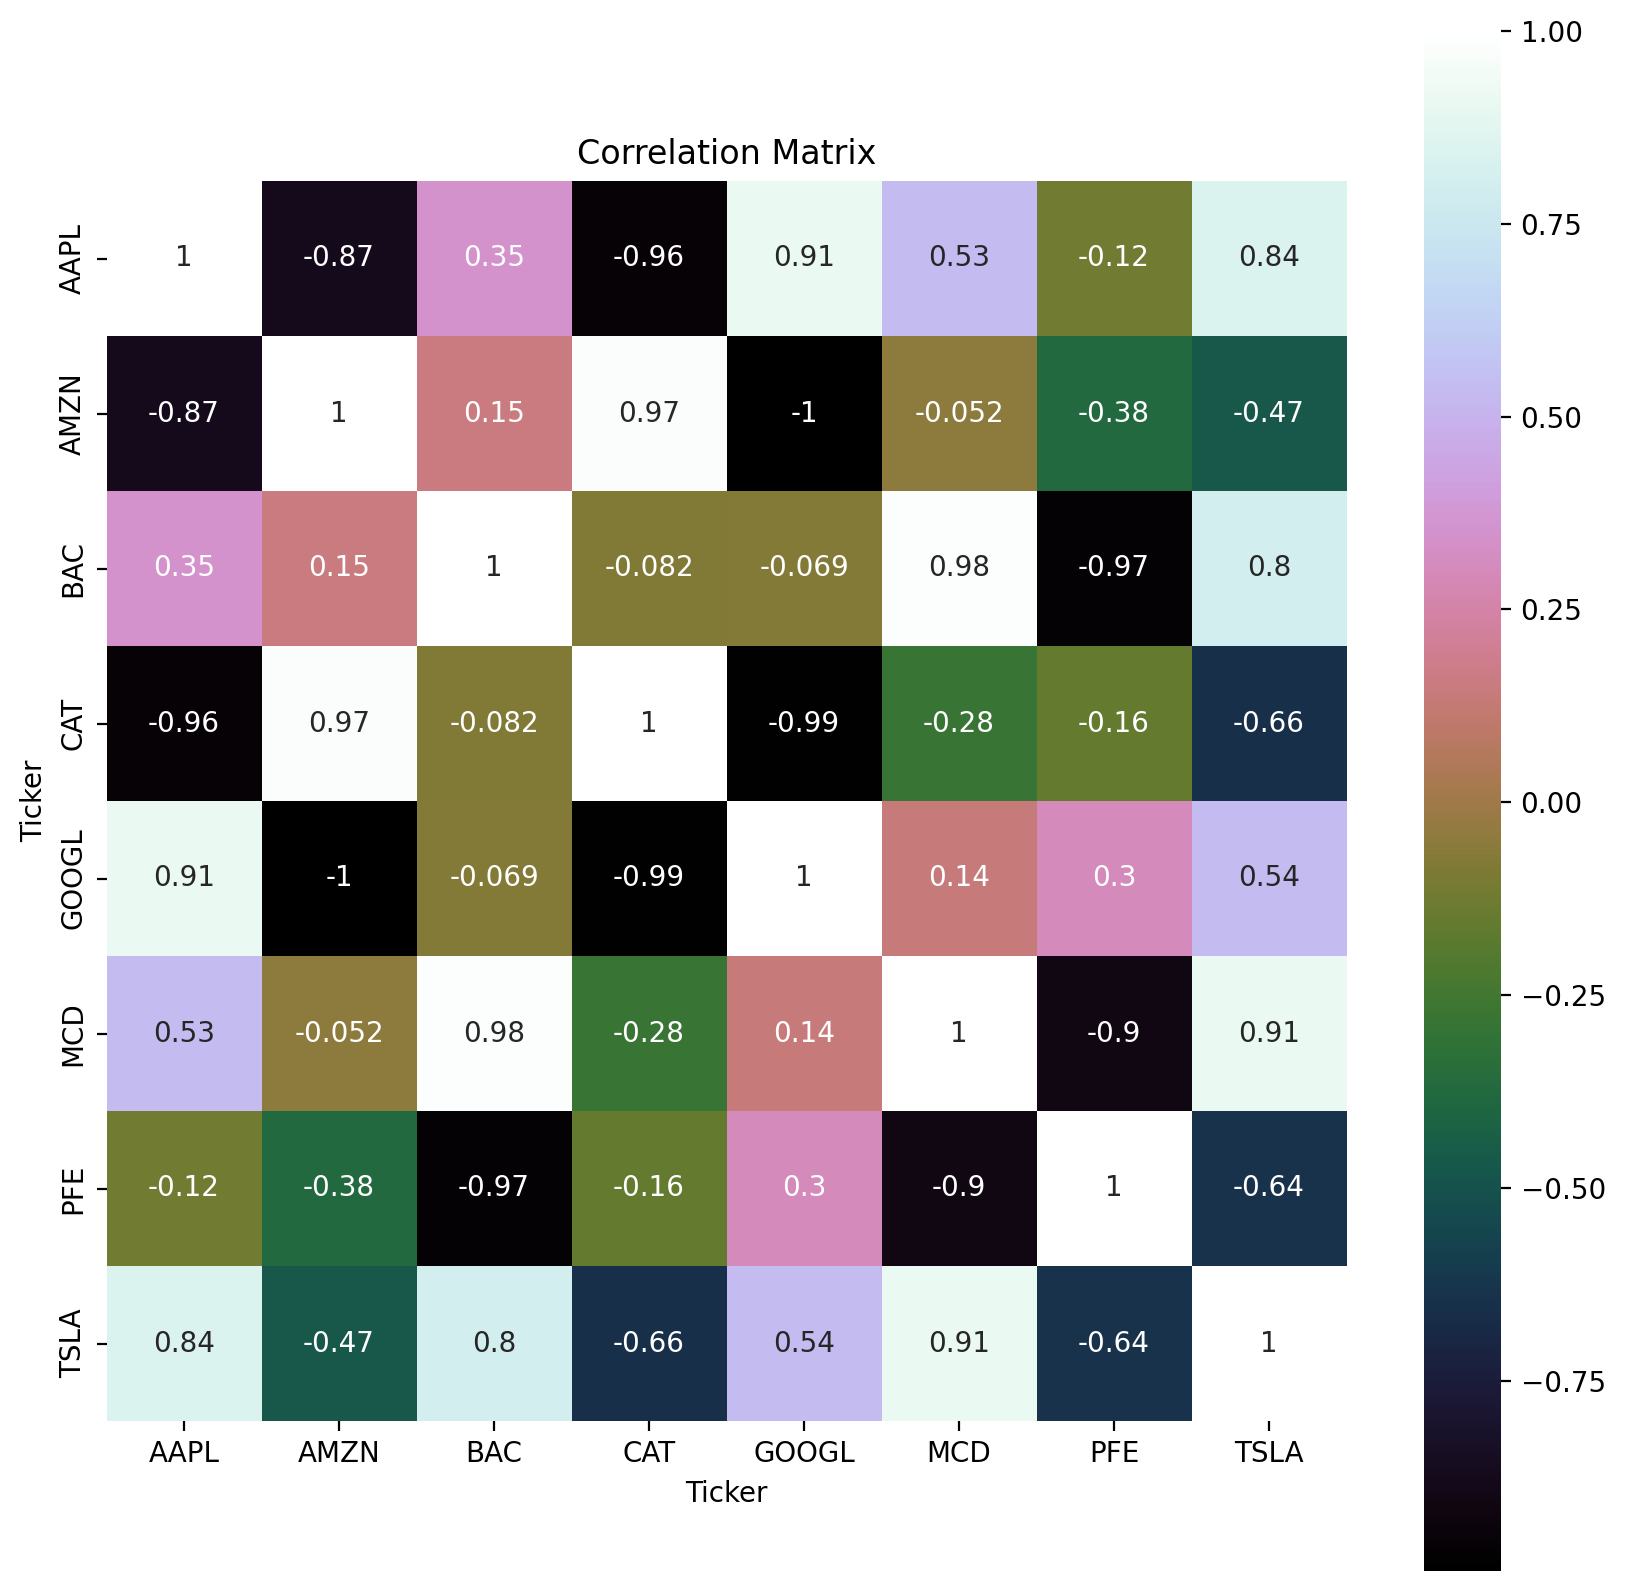

In [74]:
correlation = predicted_returns.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [95]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=pred.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    #min_vol_idx = np.argmin(results[0])
    #sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    #min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=pred.columns,columns=['allocation'])
    #min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    #min_vol_allocation = min_vol_allocation.T

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("2023 Jan 1st week  Return:", round(rp,2))
    print("2023 Jan 1st week STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    #print("-"*80)
    #print("Minimum STD Portfolio Allocation\n")
    #print("2023 Jan 1st week  Return:", round(rp_min,2))
    #print("2023 Jan 1st week  Return STD:", round(sdp_min,2))
    #print("\n")
    #print(min_vol_allocation)

    plt.figure(figsize=(8, 6))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    #plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('2023 Jan 1st week STD')
    plt.ylabel('2023 Jan 1st week returns')
    plt.legend(labelspacing=0.8)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

2023 Jan 1st week  Return: 0.08
2023 Jan 1st week STD: 0.45


Ticker      AAPL   AMZN    BAC   CAT  GOOGL    MCD   PFE   TSLA
allocation  3.39  39.88  11.53  0.93   0.11  14.01  4.32  25.83


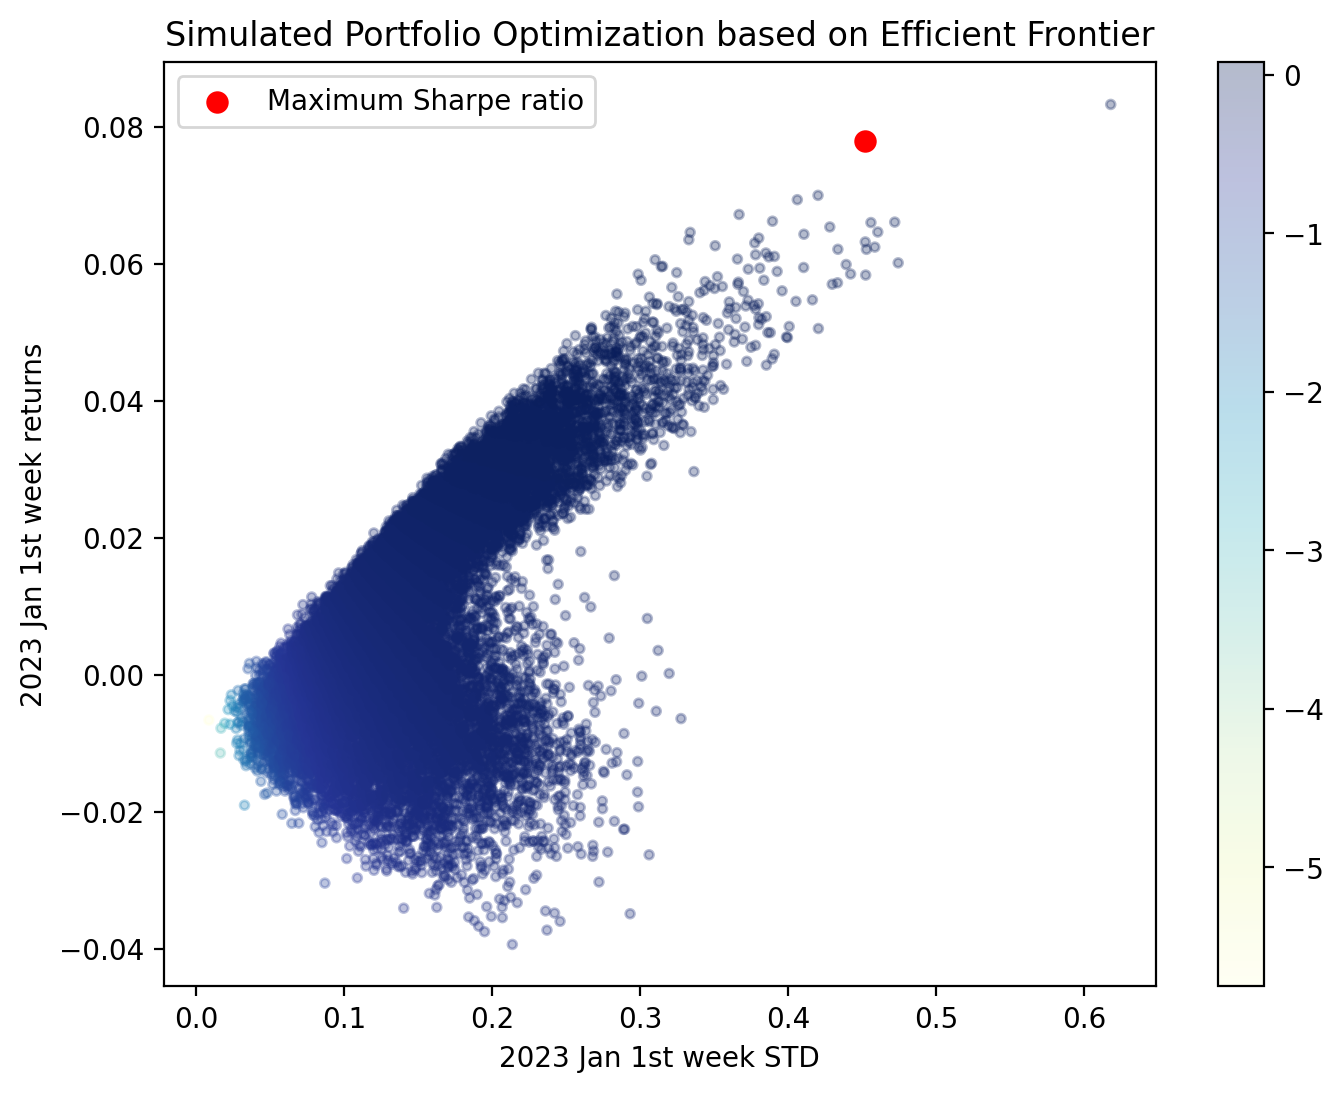

In [96]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

## Efficient Frontier

The tangent portfolio is find by solving the following problem:
$$\max_{\bf x} \frac{\bar{r}_P-r_f}{\sigma_P} $$
where
$$\bar{r}_P={\bf x}^\top \mu$$
$$\sigma_P = \sqrt{{\bf x}^\top \Sigma {\bf x}} $$
$${\bf x}^\top {\bf 1}=1$$

For the efficient frontier, it can be  found in the following way:

For a given level of expected return $r_0$, we can find the portfolio with the minimal standard deviation ( or variance) that gives the expected return $r_0$:
$$ \min_{\bf x} {\bf x}^\top \Sigma {\bf x} $$
subject to
$${\bf x}^\top \mu=r_0$$
$${\bf x}^\top {\bf 1}=1$$

By varying the value of $r_0$, we can plot the efficient frontier

### Prepare the objective function ( - Sharpe Ratio, in this case)

In [89]:
#Equality constraint: sum of weight =1, or np.sum(x)-1=0
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})

#we want to maximize the sharpe ratio, but the minimizing routine is for min
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_week2023Jan_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints) #sequential least squares programming algorithm
    return result

For a portfolio $\alpha$, its standard deviation is given by $\sigma_P=  \sqrt{\alpha^\top\Sigma\alpha}$, and expected return is $E(r_P)=\alpha^\top \mu $. This function was defined ealier

The 2nd function solves the minimization proble:
$$ \min_\alpha \sigma_P=\sqrt{\alpha^\top\Sigma\alpha}$$
This is the golbal minimum variance portfolio

**Note**: Assume there is no short sale allowed

In [90]:
def portfolio_std(weights, mean_returns, cov_matrix):
    return portfolio_week2023Jan_performance(weights, mean_returns, cov_matrix)[0]

def min_std(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

###  First function:  For a givel of expected return ('target'), find the frontier portfloio that gives the same level of expected return

### Second function: record the frontier portfolios.

In [91]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_week2023Jan_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_std, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [92]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)

    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_week2023Jan_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=pred.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T

    min_vol = min_std(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_week2023Jan_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=pred.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T

    print("-"*80)
    print("Maximum Sharpe Ratio Portfolio Allocation\n")
    print("2023 Jan 1st week return:", round(rp,2))
    print("2023 Jan 1st week return STD:", round(sdp,2))
    print("\n")
    print(max_sharpe_allocation)
    print("-"*80)
    print( "Minimum STD Portfolio Allocation\n")
    print("2023 Jan 1st week return:", round(rp_min,2))
    print("2023 Jan 1st week return STD:", round(sdp_min,2))
    print("\n")
    print(min_vol_allocation)
    plt.figure(figsize=(12, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='o',color='r',s=50, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='o',color='g',s=50, label='Minimum STD')

    x0=[0,sdp]
    y0=[risk_free_rate, rp]
   # print("tp", sdp, rp)
    plt.plot(x0,y0)

    target = np.linspace(rp_min, 0.32, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('2023 Jan 1st week return STD')
    plt.ylabel('2023 Jan 1st week returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

2023 Jan 1st week return: 0.1
2023 Jan 1st week return STD: 0.51


Ticker      AAPL   AMZN  BAC  CAT  GOOGL  MCD  PFE   TSLA
allocation   0.0  46.26  0.0  0.0    0.0  0.0  0.0  53.74
--------------------------------------------------------------------------------
Minimum STD Portfolio Allocation

2023 Jan 1st week return: -0.01
2023 Jan 1st week return STD: 0.0


Ticker      AAPL   AMZN   BAC    CAT  GOOGL   MCD    PFE  TSLA
allocation  6.99  11.19  0.59  22.42  23.98  1.36  33.24  0.24


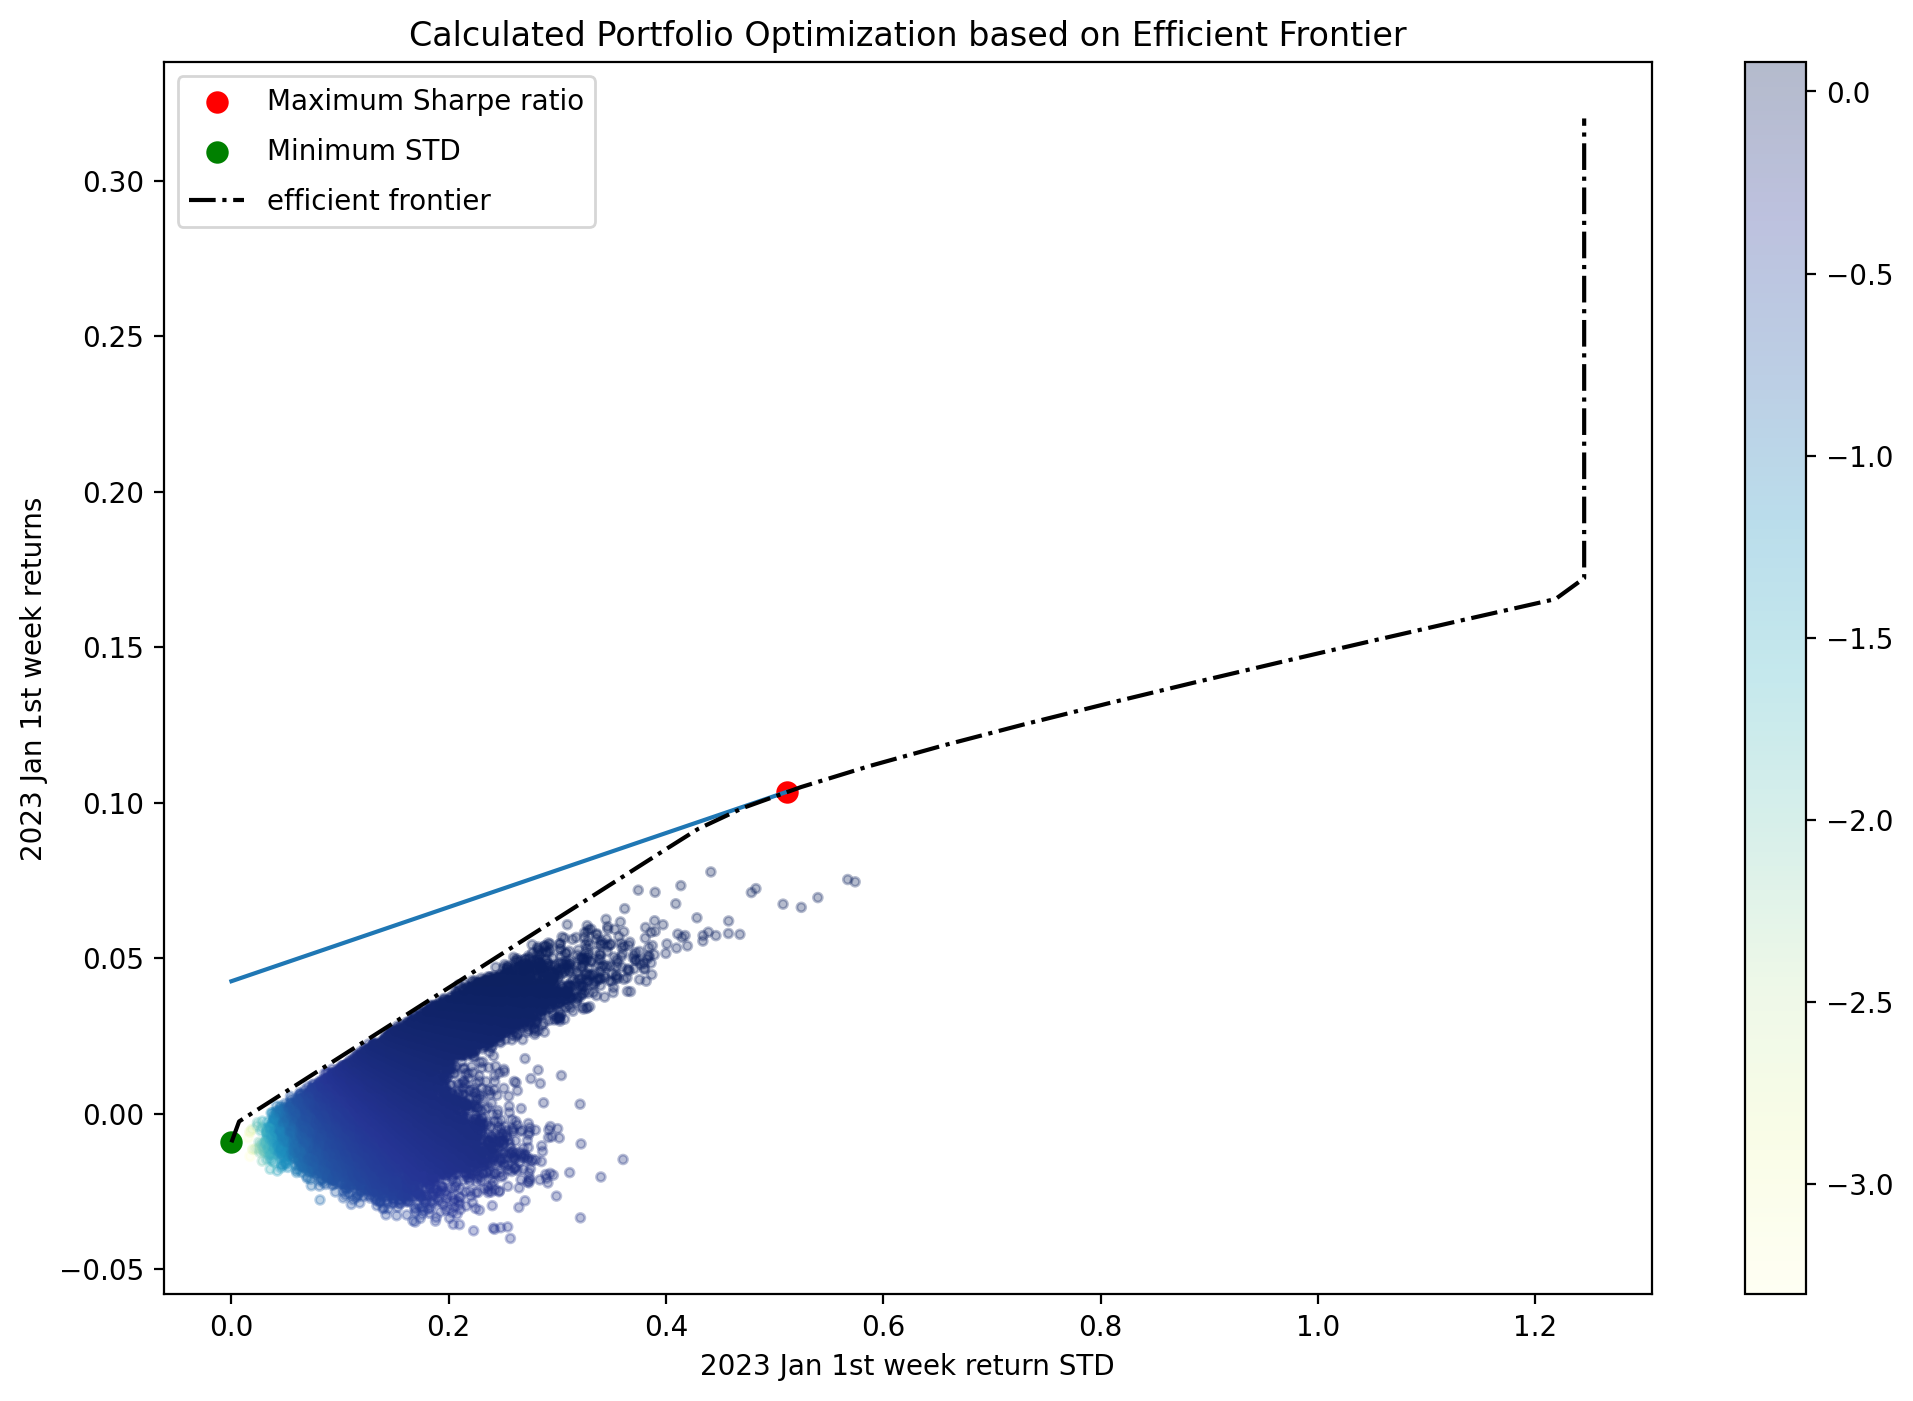

In [93]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)

***Question 1d.	What is your portfolio’s actual rate of return for the first week of January 2023?  What is the rate of return for an equally weighted portfolio?***

In [97]:
#actual adjusted close price from Yahoo finance
actuals

Ticker,AAPL,AMZN,BAC,CAT,GOOGL,MCD,PFE,TSLA
Date,,,,,,,,
2023-01-03,141.071411,87.799828,33.173725,232.396332,94.701172,262.734924,48.465282,164.395615
2023-01-04,140.624985,86.082611,33.333519,231.526276,95.675224,264.613464,48.207439,173.072998
2023-01-05,138.653961,87.373177,33.013451,231.478775,94.561127,263.692261,48.205032,170.019180
2023-01-06,136.010254,98.751991,33.096169,232.468719,88.797333,264.592041,47.921349,170.207260


Rate of return : The formula to calculate the rate of return (RoR) for each stock from day to day is given by: ((Closing Price at end of the day - Closing price  of previous day)/Closing price of previous day )* 100%

In [101]:
closing_prices  = actuals.to_numpy()
daily_returns = (closing_prices[1:] - closing_prices[:-1]) / closing_prices[:-1]
daily_returns

array([[-3.16454190e-03, -1.95583128e-02,  4.81688002e-03,
        -3.74384632e-03,  1.02855372e-02,  7.14994417e-03,
        -5.32015919e-03,  5.27835456e-02],
       [-1.40161691e-02,  1.49921741e-02, -9.60199730e-03,
        -2.05162935e-04, -1.16445778e-02, -3.48131799e-03,
        -4.99315874e-05, -1.76446805e-02],
       [-1.90669437e-02,  1.30232357e-01,  2.50558163e-03,
         4.27661006e-03, -6.09531014e-02,  3.41223618e-03,
        -5.88494112e-03,  1.10622715e-03]])

To answer the question - portfolio’s actual rate of return . the assumption is that we are taking the allocation as per finding of the highest sharpe ratio in question 1c. ie

Ticker      AAPL | AMZN | BAC | CAT  GOOGL | MCD | PFE |   TSLA

allocation  3.39 | 39.88 | 11.53 |  0.93 |  0.11 | 14.01 |  4.32 | 25.83

In [106]:
portfolio_weights = np.array([3.39 ,39.88 , 11.53 , 0.93 , 0.11 , 14.01 , 4.32 , 25.83])
portfolio_daily_returns = np.dot(daily_returns, portfolio_weights)
# Calculating the portfolio's total actual rate of return for the week
portfolio_weekly_return = np.sum(portfolio_daily_returns)
print(f"Portfolio's Daily Returns: {portfolio_daily_returns}")


Portfolio's Daily Returns: [ 0.70306156 -0.06656071  5.20614754]


In [108]:
print(f"Portfolio's Actual Rate of Return for the Week: {portfolio_weekly_return:.2%}")

Portfolio's Actual Rate of Return for the Week: 584.26%


Equal weighted portfolio for 8 stocks would mean each has allocation of 0.125
So

Ticker AAPL | AMZN | BAC | CAT GOOGL | MCD | PFE | TSLA

allocation 0.125 | 0.125 | 0.125 | 0.125 | 0.125 | 0.125 | 0.125 | 0.125

In [115]:
portfolio_eq_weights = np.array([0.125,0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125 , 0.125])
portfolio_eqw_daily_returns = np.dot(daily_returns, portfolio_eq_weights)

# Calculating the portfolio's total actual rate of return for the week
portfolio_eqw_weekly_return = np.sum(portfolio_eqw_daily_returns)

In [116]:
print(f"Portfolio's Actual Rate of Return for the Week for equal weighted portfolio: {portfolio_eqw_weekly_return:.2%}")

Portfolio's Actual Rate of Return for the Week for equal weighted portfolio: 0.72%
